In [132]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import scipy
from scipy.spatial import Delaunay
from scipy.optimize import root

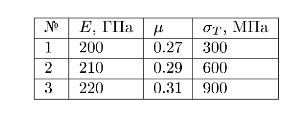

In [133]:
Image(filename='materials.png') 

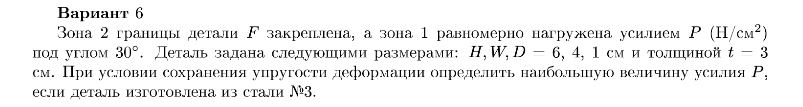

In [134]:
Image(filename='var.png') 

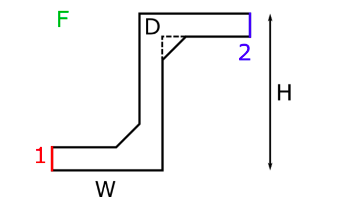

In [135]:
Image(filename='detail.png') 

In [136]:
H = 6
W = 4
D = 1 
t = 3

#все в ньютонах на сантиметр в квадрате
E = 22000000
mu = 0.31
sigma = 90000

In [137]:
G0y = np.linspace(0+0.0001, D, 10, endpoint=False)
G0x = np.zeros_like(G0y)

In [138]:
G1x = np.linspace(0+0.0001, W - 2*D, 20, endpoint=False)
G1y = np.zeros_like(G1x) + D

In [139]:
G2x = np.arange(0, D, 0.01)
G2y = G2x.copy()
G2x += (W - 2*D)
G2y += D
G2y[0] += 0.0001

In [140]:
G3y = np.linspace(2*D, H, 20, endpoint=False)
G3x = np.zeros_like(G3y) + W - D

In [141]:
G4x = np.linspace(W - D + 0.0001, 2*W - D, 20, endpoint=False)
G4y = np.zeros_like(G1x) + H

In [142]:
G5y = np.linspace(H + 0.0001, H-D, 20, endpoint=False)
G5x = np.zeros_like(G5y) + 2*W - D

In [143]:
G6x = np.linspace(2*W - D + 0.0001, W + D, 20, endpoint=False)
G6y = np.zeros_like(G6x) + H - D

In [144]:
G7x = np.flip(np.arange(0, D, 0.01))
G7y = G7x.copy()

G7x += W

G7y += H - 2*D


In [145]:
G8y = np.linspace(H - 2*D, 0, 20, endpoint=False)
G8x = np.zeros_like(G8y) + W
G8x[0] -= 0.0001

In [146]:
G9x = np.linspace(W, 0, 20, endpoint=False)
G9y = np.zeros_like(G9x)
G9y[-1] -= 0.0001

In [147]:
#Тебе нужно контролировать, что концы каждой части детали не совпадают друг с другом. 
#Если совпадают, добавь или вычти из нужного места 0.00001

print(G0x[0], G0y[0], G0x[-1], G0y[-1])
print(G1x[0], G1y[0], G1x[-1], G1y[-1])
print(G2x[0], G2y[0], G2x[-1], G2y[-1])
print(G3x[0], G3y[0], G3x[-1], G3y[-1])
print(G4x[0], G4y[0], G4x[-1], G4y[-1])
print(G5x[0], G5y[0], G5x[-1], G5y[-1])
print(G6x[0], G6y[0], G6x[-1], G6y[-1])
print(G7x[0], G7y[0], G7x[-1], G7y[-1])
print(G8x[0], G8y[0], G8x[-1], G8y[-1])
print(G9x[0], G9y[0], G9x[-1], G9y[-1])

0.0 0.0001 0.0 0.90001
0.0001 1.0 1.900005 1.0
2.0 1.0001 2.99 1.99
3.0 2.0 3.0 5.800000000000001
3.0001 6.0 6.800005 6.0
7.0 6.0001 7.0 5.050005
7.0001 5.0 5.100005 5.0
4.99 4.99 4.0 4.0
3.9999 4.0 4.0 0.19999999999999973
4.0 0.0 0.19999999999999973 -0.0001


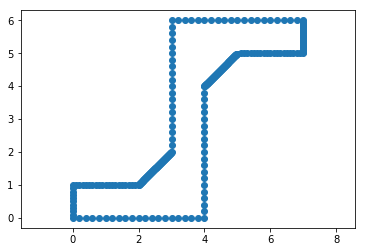

In [148]:
GNodes = np.vstack((
    np.vstack((G0x, G0y)).T,
    np.vstack((G1x, G1y)).T,
    np.vstack((G2x, G2y)).T,
    np.vstack((G3x, G3y)).T,
    np.vstack((G4x, G4y)).T,
    np.vstack((G5x, G5y)).T,
    np.vstack((G6x, G6y)).T,
    np.vstack((G7x, G7y)).T,
    np.vstack((G8x, G8y)).T,
    np.vstack((G9x, G9y)).T,
))

plt.plot(GNodes[:,0], GNodes[:,1], 'o')
plt.axis('equal');

In [149]:
margin = 0.1

#завивисит от координат детали. У меня Х минимум 0, максимум 7. У минимум 0 максимум 6. 40 - число точек.
x = np.linspace(0 + margin, 7 - margin, 40)
y = np.linspace(0 + margin, 6 - margin, 40)
X, Y = np.meshgrid(x, y)
Nodes = np.vstack((GNodes, 
                   np.vstack((X.ravel(), Y.ravel())).T  ))

In [150]:
INodes = np.vstack(np.vstack((X.ravel(), Y.ravel()))).T  


In [151]:
path = Path(GNodes)
imask = path.contains_points(INodes)
INodes = INodes[imask]

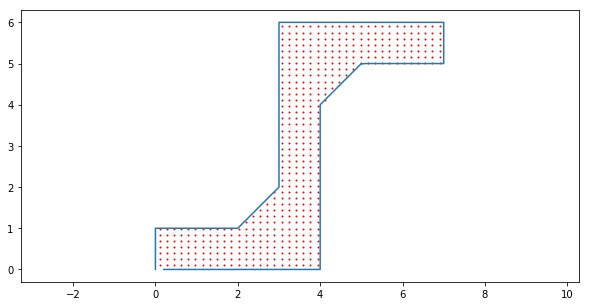

In [152]:
plt.figure(figsize = (10, 5))
plt.plot(GNodes[:,0], GNodes[:,1], '-', markersize = 2)
plt.scatter(INodes[:,0], INodes[:,1], s = 1, c = 'red')
plt.axis('equal');

In [153]:
Nodes = np.vstack((GNodes, INodes))

In [154]:
tri = Delaunay(Nodes)

In [155]:
Elems = tri.simplices.copy()

In [156]:
emask = np.logical_not(np.all(Elems < GNodes.shape[0], axis = 1))
Elems = Elems[emask]

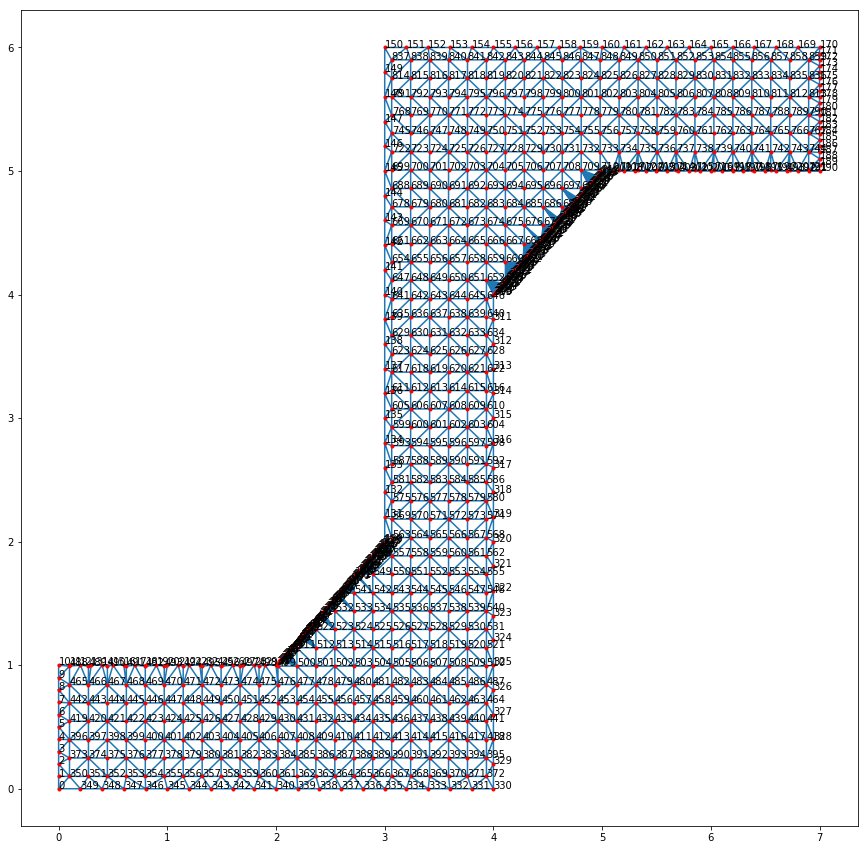

In [157]:
plt.figure(figsize = (15, 15));
plt.triplot(Nodes[:,0], Nodes[:,1], Elems);
plt.plot(Nodes[:,0], Nodes[:,1], '.', color = 'red')
for i, Node in enumerate(Nodes):
    plt.text(Node[0], Node[1], s=i)
    
plt.show()

In [158]:
Coords = Nodes[Elems]
A = 0.5 * np.cross(Coords[:,1] - Coords[:,0], Coords[:,2] - Coords[:,0])
b = np.roll(Coords[:,:,1], -1, axis = 1) - np.roll(Coords[:,:,1], 1, axis = 1)
c = np.roll(Coords[:,:,0], 1, axis = 1) - np.roll(Coords[:,:,0], -1, axis = 1)

In [159]:
B = np.zeros((Elems.shape[0],3,6))

B[:,0,0::2] = b
B[:,1,1::2] = c

B[:,2,1::2] = b
B[:,2,0::2] = c

B *= 1/(2*A[:,None,None])
Bt = np.transpose(B, axes=(0,2,1))

In [160]:
D = (E/(1 - mu**2)) * np.array([[1, mu, 0], [mu, 1, 0], [0, 0, (1 - mu)/2]])

In [161]:
Bt = np.zeros([len(A), 6, 3])

for i in range (0, len(A)):
    prom = np.array([[b[i][0], 0, b[i][1], 0, b[i][2], 0],
                        [0, c[i][0], 0, c[i][1], 0, c[i][2]],
                        [c[i][0], b[i][0], c[i][1], b[i][1], c[i][2], b[i][2]]])
    
    Bt[i] = (1/(2*A[i]))*prom.T

In [162]:
Ke = Bt@D@B

In [163]:
EFT = 2*Elems[:, [0,0,1,1,2,2]] + np.array([0,1,0,1,0,1])

In [164]:
K = np.zeros((2*Nodes.shape[0],)*2)

In [165]:
for i, e in enumerate(Elems):
    K[EFT[i,None].T, EFT[i]] += Ke[i]

inf


/Users/deniszagorodnev/.local/lib/python3.6/site-packages/numpy/linalg/linalg.py:2093: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


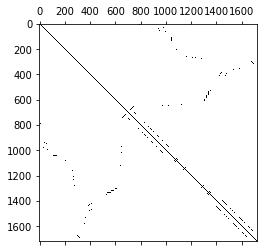

In [166]:

#проверка всей хуйни для K, следи чтобы определитель не был ноль.
print(np.linalg.det(K))
plt.spy(K)

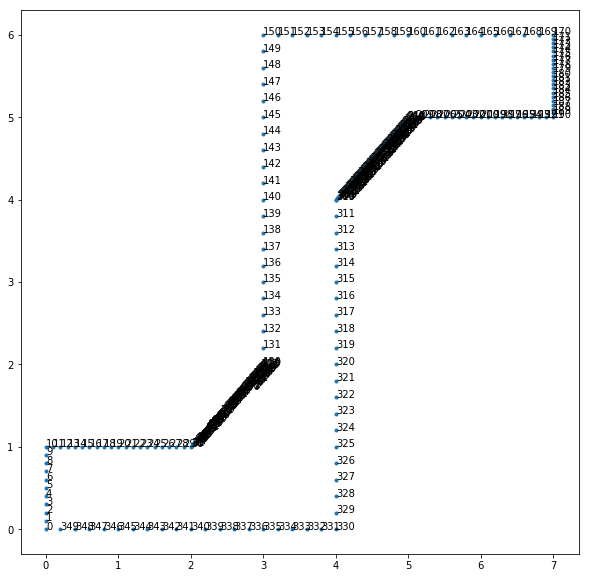

In [167]:
plt.figure(figsize=(10, 10));
plt.plot(GNodes[:,0], GNodes[:,1], '.');
for i, Node in enumerate(GNodes):
    plt.text(Node[0], Node[1], s=i)

In [168]:
F = np.zeros(2*Nodes.shape[0])

In [169]:
#целевая функция нужная для задачи 
#
def aim_function(p):

    alpha = np.deg2rad(0)
    px, py = p*np.cos(alpha), p*np.sin(alpha)

    bc_force = np.arange(1, 10)
    bc_fixed = np.arange(170, 190)
    dof = np.hstack((bc_fixed*2, bc_fixed*2+1))
    bc = {'zero':dof, 'pressure':(bc_force, (px, py))}
    
    F = np.zeros(Nodes.shape[0]*2)
    bc_force, f = bc['pressure']
    L_p = np.linalg.norm(Nodes[bc_force[1:]] - Nodes[bc_force[:-1]], axis=1)
    for i in range(len(L_p)):
        F[bc_force[[i, i+1]]*2] += L_p[i]*t*p*0.5    
    dof = bc['zero']
    K[dof, :] = 0
    K[:, dof] = 0
    K[dof, dof] = 1
    F[dof] = 0
    
    
        
    U = np.linalg.solve(K, F)
    rNodes = Nodes + 10000*U.reshape(-1, 2)
    
    Eps = B@U[EFT, None]
    Sig = D@Eps
    
    M = np.array([  [Sig[0, 0, 0],  Sig[0, 2, 0]],   [Sig[0, 2, 0],  Sig[0, 1, 0]]]  )
    S0 = 0.5*(Sig[:,0] + Sig[:,1]) +  ((0.5*(Sig[:,0] - Sig[:,1]))**2 + Sig[:,2]**2)**0.5
    
    # уравнение sigma(p) = sigma_t
    #res = max(abs(np.linalg.eigvals(M))) - sigma
    res = max(abs(S0)) - sigma
    
    return res

In [170]:
p_max = scipy.optimize.root(aim_function, 42).x
print('максимальная нагрузка в Ньютон/см**2: ', p_max[0])

максимальная нагрузка в Ньютон/см**2:  144996.68746434196


In [171]:
#пересчет на узлы для контурной карты
def calcNodeSig(U, EFT, B, D, A, Nn, Elems):
    ElemU = U[EFT, np.newaxis]
    ElemEps = np.matmul(B, ElemU)
    ElemSig = np.matmul(D, ElemEps)
    NodeSig = np.zeros((Nn, 3))
    NodeA = np.zeros(Nn)

    for i in range(Elems.shape[0]):
        NodeSig[Elems[i]] += ElemSig[i].T * A[i]
        NodeA[Elems[i]] += A[i]
    NodeSig /= NodeA.reshape(-1,1)
    return NodeSig



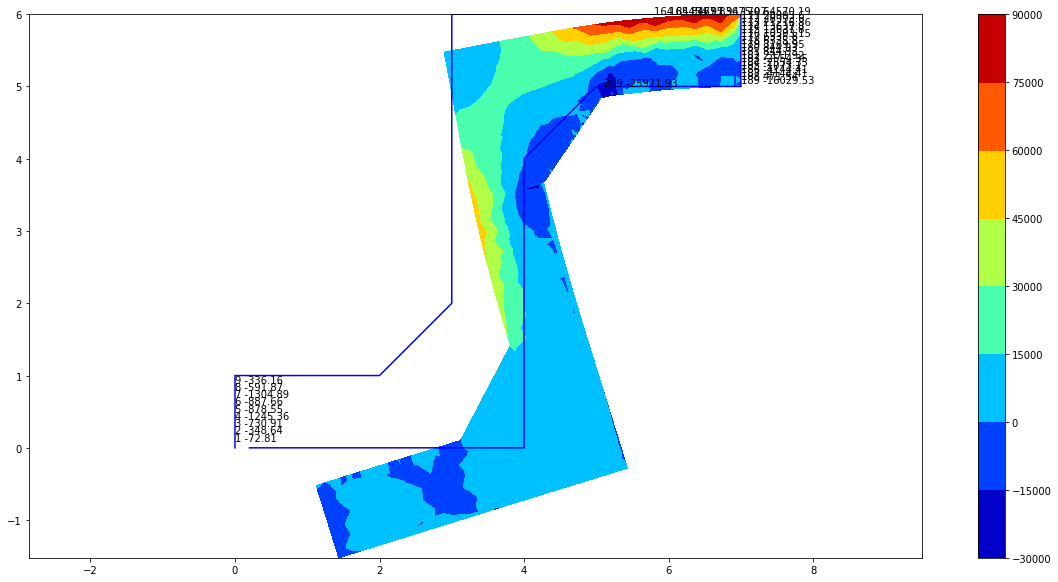

In [172]:
#расчет всего барахла для найденного корня p
#в случае, если нужно найти максимум U или чего нибудь другого нужно просто вывести на экран значение при найденном p

alpha = np.deg2rad(0)
px, py = p_max*np.cos(alpha), p_max*np.sin(alpha)

bc_force = np.arange(1, 10)
    
bc_fixed = np.arange(170, 190)
dof = np.hstack((bc_fixed*2, bc_fixed*2+1))
bc = {'zero':dof, 'pressure':(bc_force, (px, py))}
    
F = np.zeros(Nodes.shape[0]*2)
bc_force, f = bc['pressure']
L_p = np.linalg.norm(Nodes[bc_force[1:]] - Nodes[bc_force[:-1]], axis=1)
for i in range(len(L_p)):
    F[bc_force[[i, i+1]]*2] += L_p[i]*t*p_max*0.5    
dof = bc['zero']
K[dof, :] = 0
K[:, dof] = 0
K[dof, dof] = 1
F[dof] = 0   

    
U = np.linalg.solve(K, F)

NodeSig = calcNodeSig(U, EFT, B, D, A, Nodes.shape[0], Elems)
S0_node = 0.5*(NodeSig[:,0] + NodeSig[:,1]) +  ((0.5*(NodeSig[:,0] - NodeSig[:,1]))**2 + NodeSig[:,2]**2)**0.5

rNodes = Nodes + 10*U.reshape(-1, 2)
    
Eps = B@U[EFT, None]
Sig = D@Eps
    
M = np.array([  [Sig[0, 0, 0],  Sig[0, 2, 0]],   [Sig[0, 2, 0],  Sig[0, 1, 0]]]  )
S0 = 0.5*(Sig[:,0] + Sig[:,1]) +  ((0.5*(Sig[:,0] - Sig[:,1]))**2 + Sig[:,2]**2)**0.5
S1 = 0.5*(Sig[:,0] + Sig[:,1]) -  ((0.5*(Sig[:,0] - Sig[:,1]))**2 + Sig[:,2]**2)**0.5

plt.figure(figsize=(20,10))
plt.plot(GNodes[:,0], GNodes[:,1], 'b')

fixed = np.arange(170, 190)
force = np.arange(1, 10)


#первые три самые горячие и самая холодная точка
srtd = sorted(S0_node)
frst = srtd[-1]
scnd = srtd[-2]
thrd = srtd[-3]
frth = srtd[0]

ind_1 = list(S0_node).index(frst)
ind_2 = list(S0_node).index(scnd)
ind_3 = list(S0_node).index(thrd)
ind_4 = list(S0_node).index(min(srtd))

for i, Node in enumerate(GNodes):
    if i in fixed or i in force:
        plt.text(Node[0], Node[1], s= str(i) + ' ' + str(round(S0_node[i], 2)))

for i, Node in enumerate(GNodes):
    if i == ind_1 or i == ind_2 or i == ind_3 or i == ind_4:
        plt.text(Node[0], Node[1], s= str(i) + ' ' + str(round(S0_node[i], 2)))



#cont = plt.tripcolor(rNodes[:, 0], rNodes[:, 1], Elems, S0_node, cmap = 'jet');
cont = plt.tricontourf(rNodes[:, 0], rNodes[:, 1], Elems, S0_node, cmap='jet')


plt.colorbar(cont)
plt.axis('equal')
plt.show()

